In [1]:
import snpy
from pathlib import Path

snpy.__version__

'2.7.0'

In [2]:
# fix bad coding
file_to_update = Path(snpy.__path__[0], 'plot_sne_mpl.py')

# read the file
with open(file_to_update, "r") as file:
    content = file.read()

# replace the string
content = content.replace('min(8*dpi,max_width)', 'min([8*dpi, max_width])')
content = content.replace('min(8.*rows//cols*dpi, max_height)', 'min([8.*rows//cols*dpi, max_height])')

# write back to the file
with open(file_to_update, "w") as file:
    file.write(content)

In [11]:
# let's check the content of the SN file
with open('data/SN2008gp_snpy.txt') as file:
    for line in file.readlines()[:10]:
        print(line[:-1])

SN2008gp 0.03339 50.753041666666505 1.3618888888889
filter r
54768.24059000006 17.886 0.012649110799708948
54772.276049999986 17.166 0.007211102699710166
54776.23633000022 16.892 0.005830951812429521
54779.26055999985 16.786 0.011704699919631271
54781.24254000001 16.827 0.01077032947729874
54783.22978000017 16.817 0.009848857524920096
54786.344469999894 16.924 0.008544004110259785
54790.249090000056 17.149 0.008544004110259785


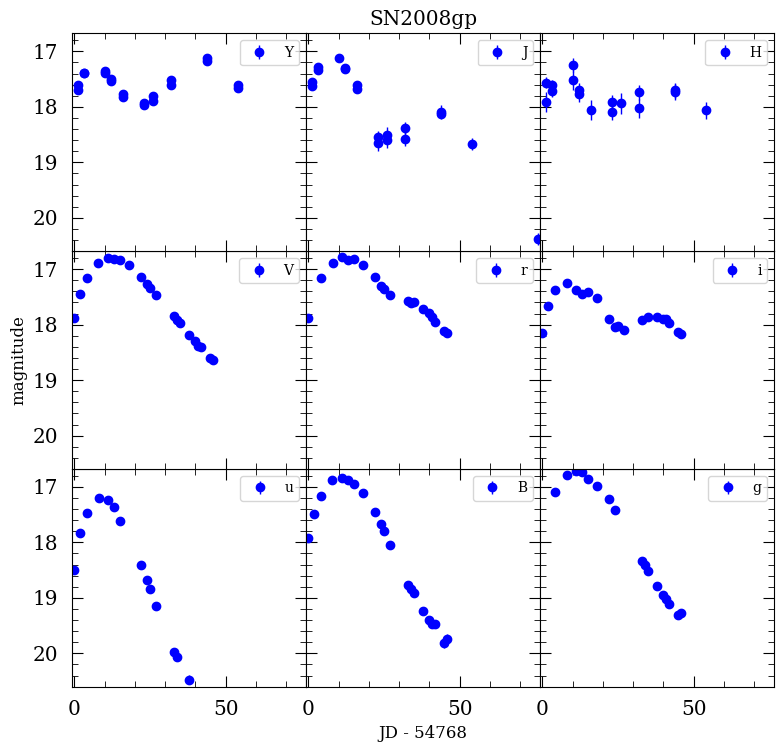

In [3]:
sn = snpy.import_lc('data/SN2008gp_snpy.txt')
sn.plot()

In [9]:
sn.restbands  # observer-frame to rest-frame "transformations" (for K-corrections)

r -> r, i -> i, u -> u, V -> V, B -> B, Y -> Y, J -> J, H -> H, g -> g, 

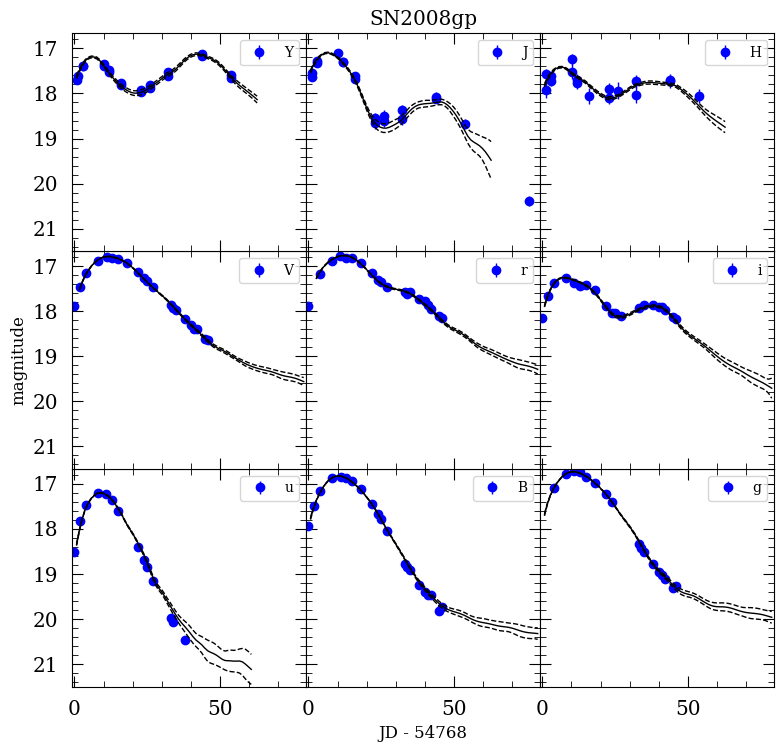

In [4]:
sn.choose_model('max_model')  # max_model EBV_model2
sn.fit()

In [6]:
sn.summary()

--------------------------------------------------------------------------------
SN  SN2008gp
z = 0.0334          zcmb = 0.0328          ra= 50.75304         dec=  1.36189 
Data in the following bands: r,  i,  u,  V,  B,  Y,  J,  H,  g,  
Fit results (if any):
   st = 0.974  +/-  0.005  +/- 0.030 (sys)
   Tmax = 54778.987  +/-  0.040  +/- 0.340 (sys)
   rmax = 16.576  +/-  0.007  +/- 0.022 (sys)
   imax = 17.167  +/-  0.009  +/- 0.022 (sys)
   umax = 16.678  +/-  0.013  +/- 0.030 (sys)
   Vmax = 16.445  +/-  0.006  +/- 0.019 (sys)
   Bmax = 16.435  +/-  0.007  +/- 0.012 (sys)
   Ymax = 17.192  +/-  0.019  +/- 0.050 (sys)
   Jmax = 17.080  +/-  0.029  +/- 0.044 (sys)
   Hmax = 17.470  +/-  0.061  +/- 0.055 (sys)
   gmax = 16.394  +/-  0.007  +/- 0.014 (sys)


In [10]:
sn.model.parameters

{'st': np.float64(0.9735007132728037),
 'Tmax': np.float64(54778.986964634394),
 'rmax': np.float64(16.576207354442918),
 'imax': np.float64(17.16671465109264),
 'umax': np.float64(16.677918043443224),
 'Vmax': np.float64(16.445147691948556),
 'Bmax': np.float64(16.43479848453715),
 'Ymax': np.float64(17.191881968451966),
 'Jmax': np.float64(17.080292461756112),
 'Hmax': np.float64(17.469504032610285),
 'gmax': np.float64(16.394482261032433)}